In [1]:
'''
1. Analysis - univariate , multivariate
2. Feature Engineering - creating new columns, modifying existing ones
3. Handling Outliers - detect outliers , remove outliers
'''

'\n1. Analysis - univariate , multivariate\n2. Feature Engineering - creating new columns, modifying existing ones\n3. Handling Outliers - detect outliers , remove outliers\n'

In [2]:
#importing the neccessary packages...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#importing  the dataset
df = pd.read_csv('titanic.csv')


In [4]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [9]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
#statistical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [12]:
#dealing with missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# conclusions
# 1. missing values in age, cabin , and embarked columns
# 2. more than 70 percent values are missing in cabin columns, will have to drop
# 3. few columns have inappropriate data types

In [14]:
df.drop(columns=['Cabin'], inplace = True)

In [15]:
# filling missing values for age
df['Age'].fillna(df['Age'].mean(), inplace= True)

In [16]:
df['Embarked'].value_counts()
df['Embarked'].fillna('S', inplace = True)

In [17]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [18]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(3), int32(1), int64(3), object(4)
memory usage: 73.2+ KB


In [36]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
#univarieate Analysis


out of 891  62 percentage died in the accident


C:\Users\soumy\anaconda11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


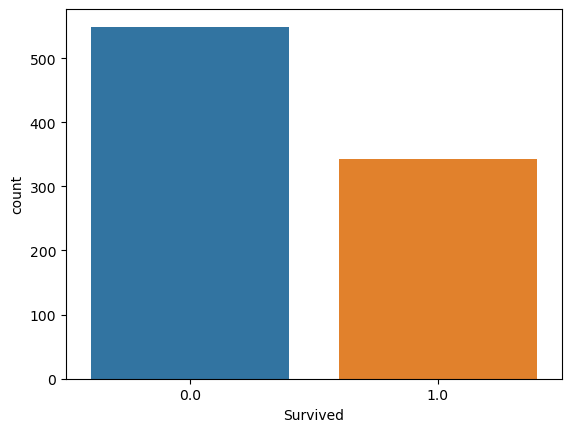

In [38]:
sns.countplot(df['Survived'])
death_percent = round((df['Survived'].value_counts().values[0]/891)*100)
print('out of 891  {} percentage died in the accident'.format(death_percent))


3.0    55.106622
1.0    24.242424
2.0    20.650954
Name: Pclass, dtype: float64


C:\Users\soumy\anaconda11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

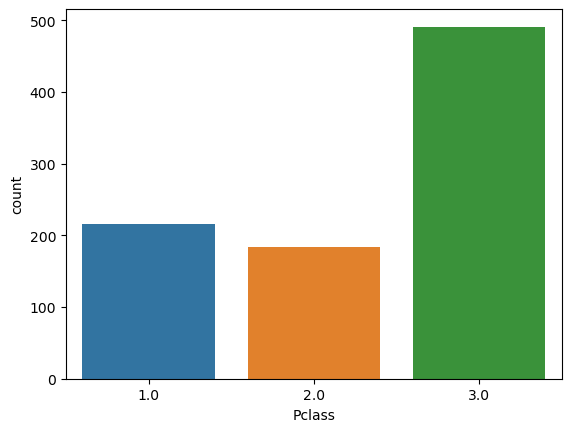

In [39]:
# Pclass column
print((df['Pclass'].value_counts()/891)*100)
sns.countplot(df['Pclass'])

male      64.758698
female    35.241302
Name: Sex, dtype: float64


C:\Users\soumy\anaconda11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

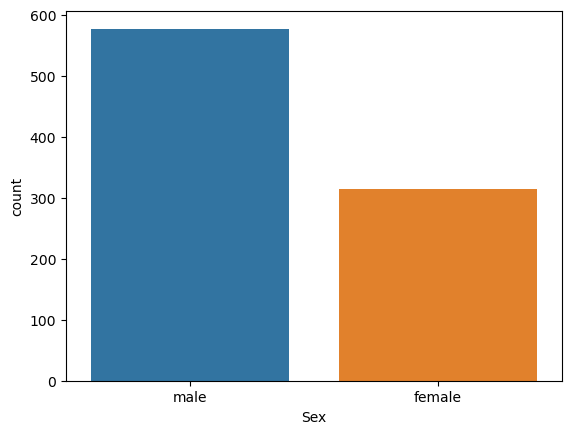

In [40]:
# Sex Column
print((df['Sex'].value_counts()/891)*100)
sns.countplot(df['Sex'])

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


C:\Users\soumy\anaconda11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

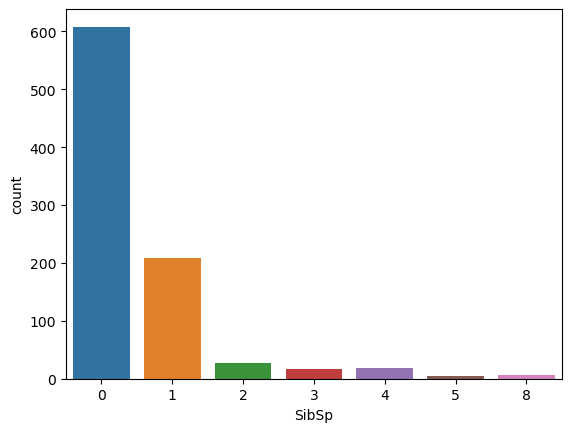

In [41]:
# SibSp columns
print(df['SibSp'].value_counts())

sns.countplot(df['SibSp'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


C:\Users\soumy\anaconda11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

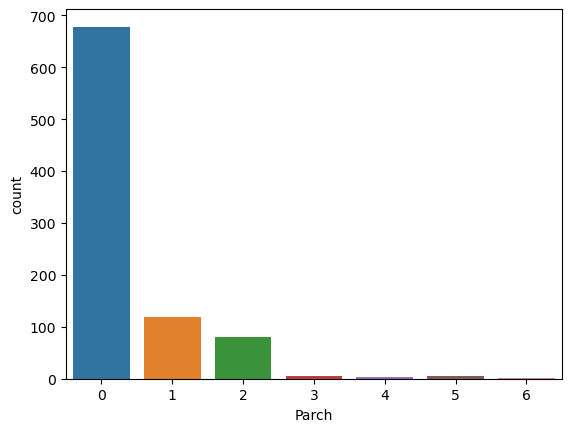

In [42]:
# Parch columns
print((df['Parch'].value_counts()/891)*100)
sns.countplot(df['Parch'])

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


C:\Users\soumy\anaconda11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

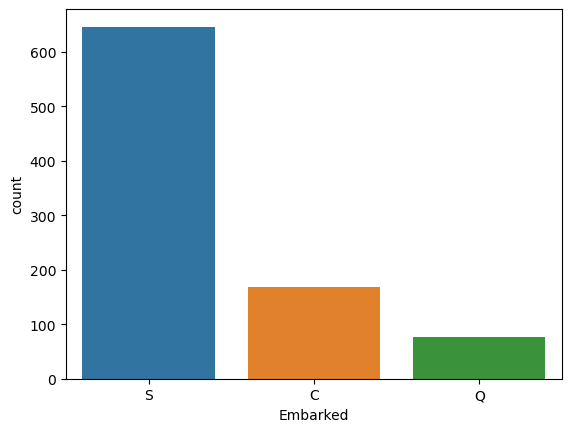

In [43]:
# Embarked column
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(df['Embarked'])

C:\Users\soumy\anaconda11\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.45956263424701577
0.9865867453652877


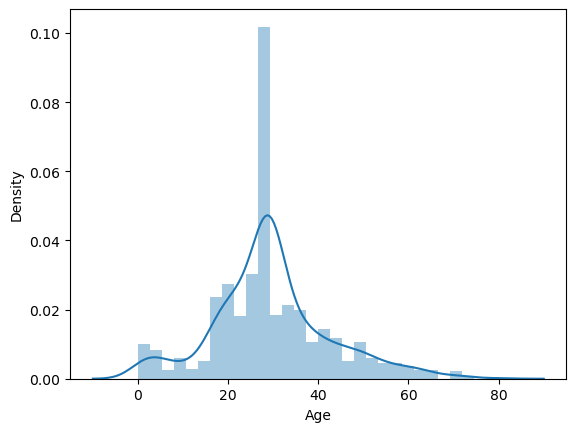

In [44]:
# Age column
sns.distplot(df['Age'])
print(df['Age'].skew())
print(df['Age'].kurt())

C:\Users\soumy\anaconda11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

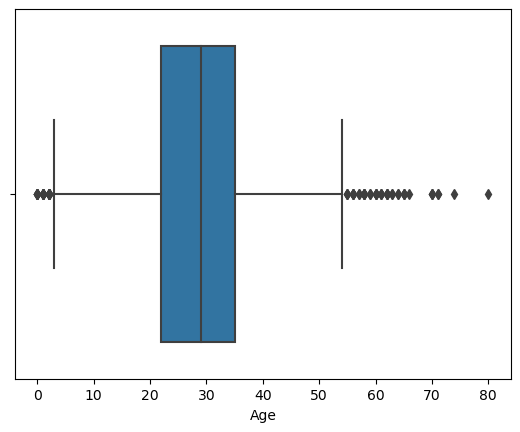

In [45]:
sns.boxplot(df.Age)

In [46]:
#conclusion 

# age can be considered as normal distribution 
# deeper analysis is required for outliers 

C:\Users\soumy\anaconda11\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


4.787316519674893
33.39814088089868


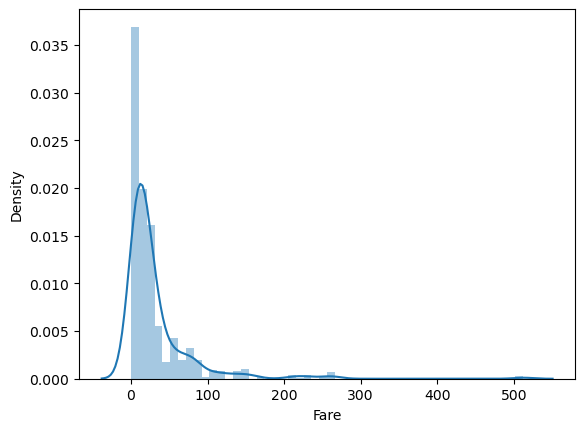

In [47]:
# Fare columns
sns.distplot(df['Fare'])
print(df['Fare'].skew())
print(df['Fare'].kurt())

C:\Users\soumy\anaconda11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

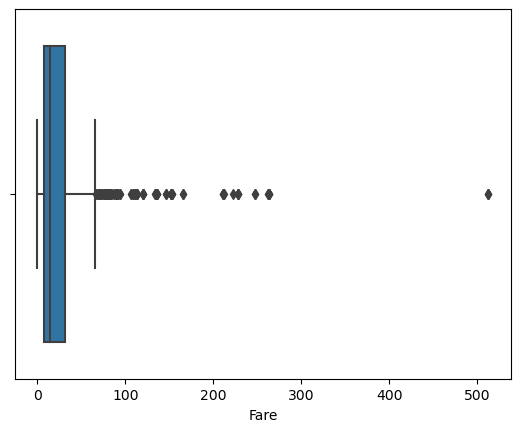

In [48]:
sns.boxplot(df.Fare)

In [49]:
print('people with fare in greater than $300','is --', df[df['Fare']>300].shape[0])

people with fare in greater than $300 is -- 3


In [50]:
# conclusion

# highly skewed data , a lot of people had cheaper tickets
# outliers are there in the data

C:\Users\soumy\anaconda11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0.0,1.0
Pclass,,
1.0,37.0,63.0
2.0,52.7,47.3
3.0,75.8,24.2


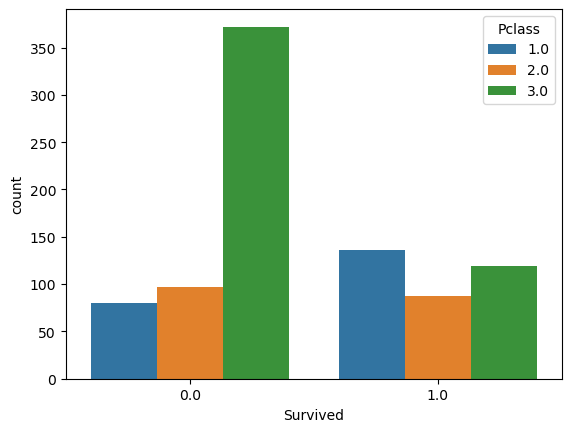

In [51]:
# multivariate Analysis
# Survival with Pclass

sns.countplot(df['Survived'], hue= df['Pclass'])
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

C:\Users\soumy\anaconda11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0.0,1.0
Sex,,
female,25.8,74.2
male,81.1,18.9


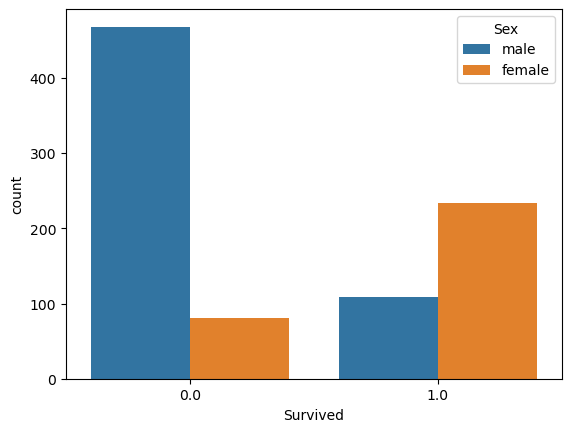

In [52]:
# Survival with Sex


sns.countplot(df['Survived'], hue= df['Sex'])
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

C:\Users\soumy\anaconda11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0.0,1.0
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


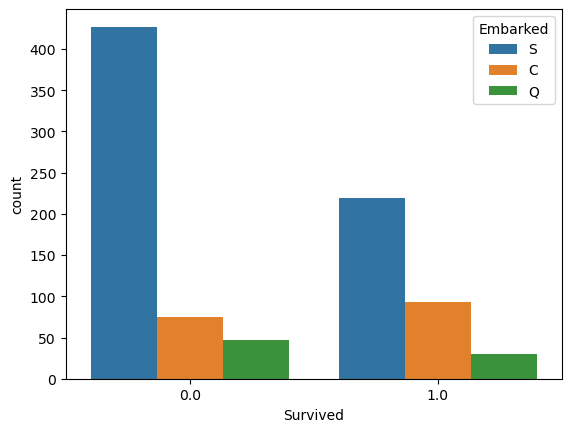

In [53]:
# Survival with Embarked



sns.countplot(df['Survived'], hue= df['Embarked'])
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

C:\Users\soumy\anaconda11\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\soumy\anaconda11\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

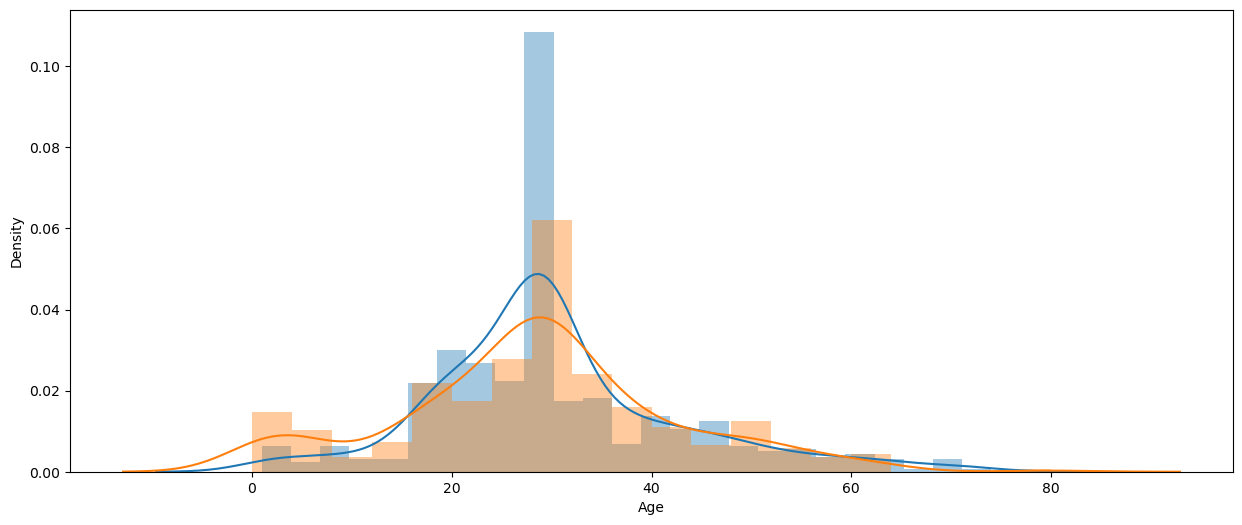

In [54]:
# Survived with Age
plt.figure(figsize=(15, 6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

C:\Users\soumy\anaconda11\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\soumy\anaconda11\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

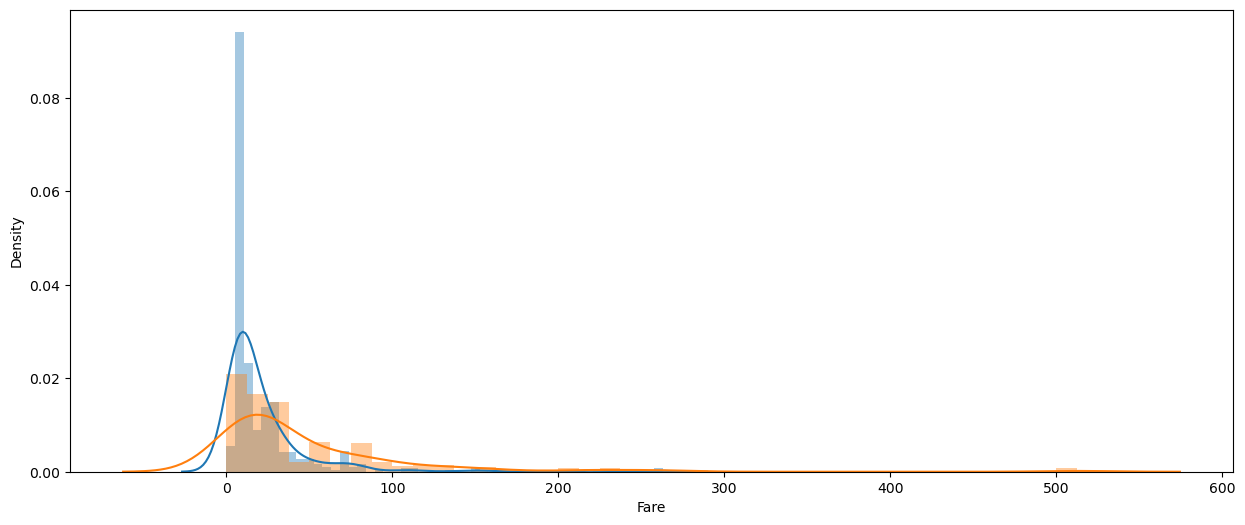

In [55]:
# Survived with Fare
plt.figure(figsize=(15, 6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

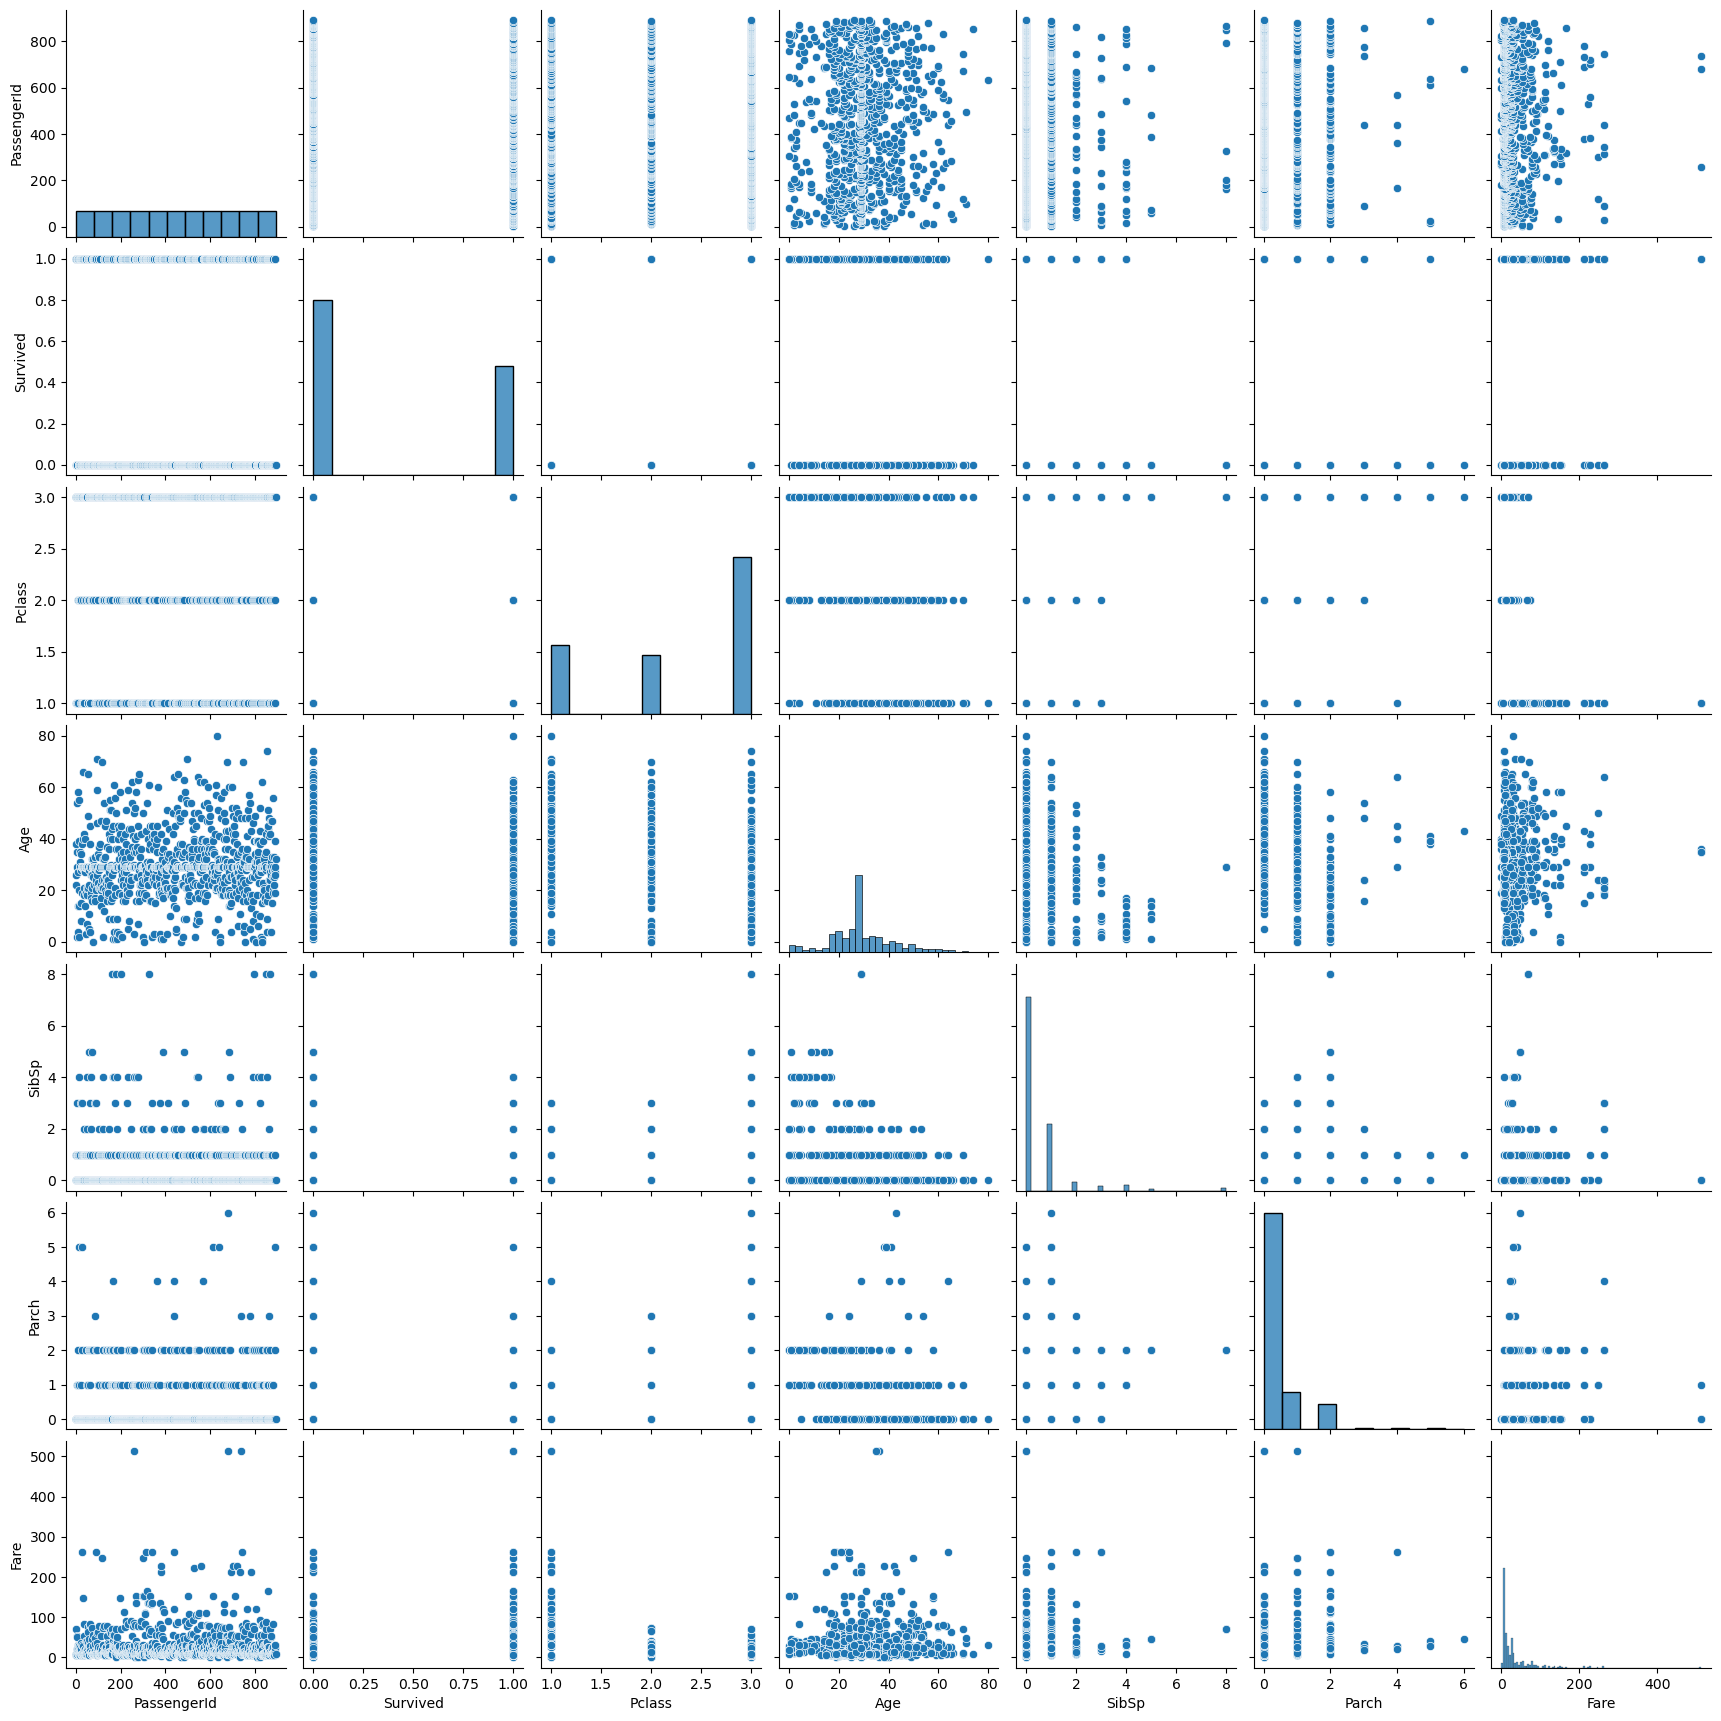

In [56]:
sns.pairplot(df)

<AxesSubplot:>

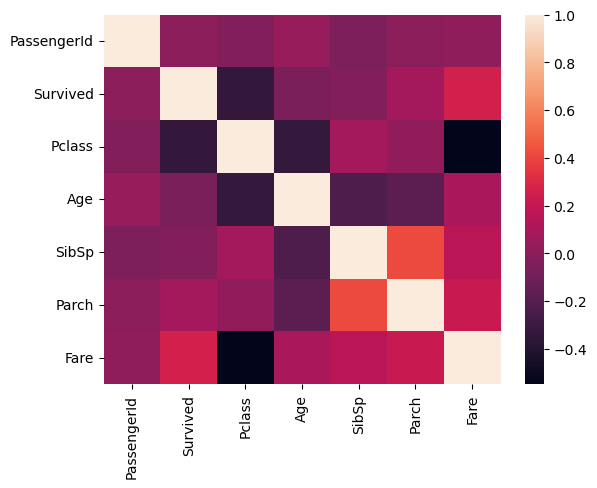

In [57]:
sns.heatmap(df.corr())

In [58]:
# we will create a new column by the name of family which will be the sum of SibSp and Parch cols
df['family_size'] = df['Parch']+df['SibSp']

In [59]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
303,304,1.0,2.0,"Keane, Miss. Nora A",female,29,0,0,226593,12.35,Q,0


In [60]:
def family_type(number):
    if number ==0:
        return 'Alone'
    elif number > 0 and number <4:
        return 'Medium'
    else:
        return 'Large'

In [61]:
df['family_type'] = df['family_size'].apply(family_type)

In [62]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
507,508,1.0,1.0,"Bradley, Mr. George (""George Arthur Brayton"")",male,29,0,0,111427,26.5500,S,0,Alone
206,207,0.0,3.0,"Backstrom, Mr. Karl Alfred",male,32,1,0,3101278,15.8500,S,1,Medium
60,61,0.0,3.0,"Sirayanian, Mr. Orsen",male,22,0,0,2669,7.2292,C,0,Alone
843,844,0.0,3.0,"Lemberopolous, Mr. Peter L",male,34,0,0,2683,6.4375,C,0,Alone
308,309,0.0,2.0,"Abelson, Mr. Samuel",male,30,1,0,P/PP 3381,24.0000,C,1,Medium


In [63]:
df.drop(columns=['SibSp', 'Parch', 'family_size'], inplace = True)

In [64]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

Survived,0.0,1.0
family_type,,
Alone,69.6,30.4
Large,83.9,16.1
Medium,42.1,57.9


In [65]:
df = df[df['Age'] <(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [66]:
# handling outliers from Fare columns

# Finding quartiles

Q1 = np.percentile(df['Fare'], 25)
Q3 = np.percentile(df['Fare'], 75)

outlier_low = Q1 - 1.5 *(Q3-Q1)
outlier_high = Q3 + 1.5 *(Q3-Q1)

df = df[(df['Fare']> outlier_low) & (df['Fare']<outlier_high)]

In [67]:
# one hot encoding
pd.get_dummies(data= df, columns=['Pclass','Sex', 'Embarked', 'family_type'], drop_first = True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2.0,Pclass_3.0,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0.0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,1
2,3,1.0,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,0,0,0,1,0,1
4,5,0.0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,1,0,0
5,6,0.0,"Moran, Mr. James",29,330877,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,"Montvila, Rev. Juozas",27,211536,13.0000,1,0,1,0,1,0,0
887,888,1.0,"Graham, Miss. Margaret Edith",19,112053,30.0000,0,0,0,0,1,0,0
888,889,0.0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,0,1,0,0,1,0,1
889,890,1.0,"Behr, Mr. Karl Howell",26,111369,30.0000,0,0,1,0,0,0,0


In [68]:
#We have seen that some of the columns in the dataset are present in string format, we are converting it in intger format using Label Encoding.

In [69]:
# apply label encoding
from sklearn import preprocessing

In [70]:
le=preprocessing.LabelEncoder()

In [71]:
df['Name']=le.fit_transform(df['Name'])

In [72]:
df['Sex']=le.fit_transform(df['Sex'])

In [73]:
df['Ticket']=le.fit_transform(df['Ticket'])

In [74]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [75]:
df['family_type']=le.fit_transform(df['family_type'])

In [76]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
0,1,0.0,3.0,91,1,22,492,7.2500,2,2
2,3,1.0,3.0,294,0,26,615,7.9250,2,0
3,4,1.0,1.0,227,0,35,41,53.1000,2,2
4,5,0.0,3.0,14,1,35,441,8.0500,2,0
5,6,0.0,3.0,476,1,29,252,8.4583,1,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,470,1,27,80,13.0000,2,0
887,888,1.0,1.0,254,0,19,11,30.0000,2,0
888,889,0.0,3.0,346,0,29,621,23.4500,2,2
889,890,1.0,1.0,68,1,26,5,30.0000,0,0


In [77]:
# now training the model
from sklearn.model_selection import train_test_split

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [79]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
    


In [81]:
x_train.shape

(538, 9)

In [82]:
x_test.shape

(231, 9)

In [83]:
y_train.shape

(538,)

In [84]:
y_test.shape

(231,)

In [85]:
# finding the best model 

lg=LogisticRegression()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
svc=SVC()

In [86]:
model=[lg,dtc,rf,ad,svc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy_score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

C:\Users\soumy\anaconda11\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: LogisticRegression()
0.8051948051948052
[[147  21]
 [ 24  39]]
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       168
         1.0       0.65      0.62      0.63        63

    accuracy                           0.81       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.80      0.81      0.80       231

accuracy_score: DecisionTreeClassifier()
0.7489177489177489
[[136  32]
 [ 26  37]]
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       168
         1.0       0.54      0.59      0.56        63

    accuracy                           0.75       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.76      0.75      0.75       231

accuracy_score: RandomForestClassifier()
0.8484848484848485
[[155  13]
 [ 22  41]]
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90   

C:\Users\soumy\anaconda11\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soumy\anaconda11\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soumy\anaconda11\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
0,1,0.0,3.0,91,1,22,492,7.2500,2,2
2,3,1.0,3.0,294,0,26,615,7.9250,2,0
3,4,1.0,1.0,227,0,35,41,53.1000,2,2
4,5,0.0,3.0,14,1,35,441,8.0500,2,0
5,6,0.0,3.0,476,1,29,252,8.4583,1,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,470,1,27,80,13.0000,2,0
887,888,1.0,1.0,254,0,19,11,30.0000,2,0
888,889,0.0,3.0,346,0,29,621,23.4500,2,2
889,890,1.0,1.0,68,1,26,5,30.0000,0,0


In [88]:
#cross validation

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('score:',m)
    print(score)
    print(score.mean())

score: LogisticRegression()
[0.7012987  0.73376623 0.77272727 0.77922078 0.78431373]
0.7542653425006366
score: DecisionTreeClassifier()
[0.64935065 0.77272727 0.77922078 0.75324675 0.83006536]
0.7569221628045157


C:\Users\soumy\anaconda11\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\soumy\anaconda11\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

score: RandomForestClassifier()
[0.83116883 0.80519481 0.85714286 0.85064935 0.85620915]
0.8400729988965283
score: AdaBoostClassifier()
[0.71428571 0.77272727 0.78571429 0.7987013  0.71895425]
0.7580765639589169
score: SVC()
[0.66233766 0.66233766 0.65584416 0.65584416 0.66013072]
0.659298871063577


In [91]:
#hyper parameter tunning

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,
                 param_grid=grid_param,
                 scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.7248875043267566


In [94]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x,y)
dtc.score(x,y)

1.0

In [ ]:
parameters={'kernel':['linear','rbf'],'C':[1,10]}
clf = GridSearchCV(svc,parameters)
clf.fit(x,y)
clf

print(clf.best_params_) 

In [ ]:
svc=SVC(kernel='linear',C=1)
svc.fit(x,y)
t=svc.score(x,y)
print(round(t,2))

In [ ]:
grid_params_={'n_neighbors':np.arange(1,12,2),
             'weights':['uniform','distance']}
gscv=GridSearchCV(knn,grid_params_,cv=5)
gscv.fit(x,y)

best_parameters=gscv.best_params_
print(best_parameters)

In [ ]:
#saving the best model

In [ ]:
import joblib

joblib.dump(dtc,'dtcfile.obj')

dtc_from_joblib=joblib.load('dtcfile.obj')